## Descriptive statistics, wrangling and consistency check

__01. Importing Libraries__

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

__02. Importing Dataset__

In [5]:
df = pd.read_csv(r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis/02 Data/Original Data/munich.csv', index_col = False)

In [6]:
#command to display all columns on the dataset
pd.set_option('display.max_columns', None)

In [14]:
df.head(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11492,11.48954,Entire home/apt,80,2,129,2019-10-03,1.04,2,22,0,NaN
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.12071,11.63758,Entire home/apt,95,2,53,2019-10-06,0.42,2,52,0,NaN
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15199,11.56482,Entire home/apt,99,3,101,2021-10-11,0.79,1,4,8,NaN
3,159634,"Fancy, bright central roof top flat and homeof...",765694,Sanna,NaN,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52,3,34,2020-12-23,0.27,1,0,0,NaN
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.10814,11.52733,Private room,55,2,496,2021-11-08,3.97,1,162,18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,321542,Absolute quiet room,1646639,Walter,NaN,Thalkirchen-Obersendling-Forstenried-Fürstenri...,48.09307,11.52147,Private room,42,16,26,2019-10-11,0.22,1,359,0,NaN
96,392399,"Sunny room, private bathroom and roof top terrace",1962150,Christa,NaN,Sendling,48.11397,11.54844,Private room,68,2,92,2019-11-29,0.78,1,0,0,NaN
97,406404,Holiday Flat in Munich Schwabing,2024648,Tammy,NaN,Schwabing-West,48.17723,11.58283,Entire home/apt,120,30,1,2012-11-17,0.01,4,357,0,NaN
98,483093,cozy-apartment - *WLAN* PARKING,2391129,Julia Und Lisa,NaN,Ramersdorf-Perlach,48.09748,11.63993,Entire home/apt,350,2,169,2021-10-11,1.45,3,265,7,NaN


__03. Data Wrangling, Consistency Check and Cleaning__

In [8]:
#checking the shape of our data set
df.shape

(4995, 18)

In [9]:
#checking the types of our data set
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [10]:
#id and host_id will be change to exclude it from describe
df['id'] = df['id'].astype('str')
df['host_id'] = df['host_id'].astype('str')

In [11]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [12]:
#Duplicate Check - There is no duplocate
print(df.duplicated().sum())

0


In [15]:
#Checking for missing data
df.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            1
neighbourhood_group               4995
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1183
reviews_per_month                 1183
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           4995
dtype: int64

All of the missing data is not relevant for the analysis, name,host_name, license and last_review & review_per_month - I will leave it as it is.

In [18]:
#dropping neighbourhood_group,last_review,review_per_month and license column since I wont be needing it for the analysis
df = df.drop(df.columns[[4,12,13,17]], axis=1) 

In [19]:
df.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4990,53933449,"Tiny House \n""Holzofen Lodge""",8767947,Reno,Pasing-Obermenzing,48.147057,11.482297,Entire home/apt,12,30,0,1,365,0
4991,53935376,Haus mit Garten im grünen Münchner Westen,22253535,Julia,Pasing-Obermenzing,48.131398,11.452456,Entire home/apt,85,120,0,1,191,0
4992,53936793,Dein neues Zuhause in München -schönes Zimmer,434644613,Norbert,Pasing-Obermenzing,48.144516,11.467485,Private room,35,28,0,2,365,0
4993,53945865,"Modern 125Sqm 2BR apartment, carpark, Olympia ...",10419667,Emily,Milbertshofen-Am Hart,48.173054,11.560052,Entire home/apt,124,21,0,1,65,0
4994,53949583,Amazing Duplex flat with balcony,434352177,Kathrin,Berg am Laim,48.127276,11.639675,Entire home/apt,77,1,0,2,7,0


In [20]:
#Checking for columns with mixed data types

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

name
host_name


These 2 columns has a mixing data types, however I won't be needing it for the analysis - however since I will keep NaN as it is and will convert them to "missing" or 0 to make it dtypes consistent

In [21]:
# Replace Nan with missing
df['name'].fillna('missing', inplace=True)

In [22]:
# Check
df['name'].value_counts(dropna=False)

Business Single Apartment                             7
Komfortables Zimmer in City-Nähe (Super 8 West)       6
PM-Rooms : Cozy hostel in Munich                      6
Chummy Room, 5 min to Oktoberfest                     6
München Mehrparteienhaus                              5
                                                     ..
🎖-30% LISA’S DeluXXe Apartment Munich city center     1
🎖-30% Lisa’s Deluxe Apartment Munich City Downtown    1
Cozy and Chic Apartment City Center / Own kitchen     1
Cozy apt in "Glockenbachviertel" close to the Isar    1
Amazing Duplex flat with balcony                      1
Name: name, Length: 4871, dtype: int64

In [23]:
# Assign str to column name
df['name'] = df['name'].astype('str')

In [24]:
# Check again for mixed type columns
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

host_name


In [25]:
# Do the same for host_name
df['host_name'].fillna('missing', inplace=True)

In [27]:
df['host_name'] = df['host_name'].astype('str')

In [28]:
# Check again for mixed type columns
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

There are no more mixed types column

In [29]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [30]:
#checking summary stats
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,48.140613,11.565088,127.856256,9.006807,22.338138,2.559159,135.479680,3.485686
std,0.025502,0.047024,374.145481,31.415472,55.676039,4.541520,136.233306,12.682482
min,48.068870,11.366801,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,48.123745,11.540435,55.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,48.137520,11.565530,81.000000,2.000000,4.000000,1.000000,88.000000,0.000000
75%,48.157410,11.586970,125.000000,5.000000,17.000000,2.000000,268.000000,2.000000
max,48.229500,11.711980,9999.000000,1000.000000,765.000000,33.000000,365.000000,450.000000


We need to look deeper on the column price (min 0 and max 10.999), and availability_365

In [31]:
df.shape

(4995, 14)

In [32]:
#checking column price - make a subset for price
price = df['price']

In [33]:
# Check value counts
price.value_counts(dropna=False)

60      149
80      143
50      142
100     139
70      136
       ... 
1000      1
216       1
8000      1
302       1
169       1
Name: price, Length: 361, dtype: int64

In [34]:
df.value_counts(df.price == '0').count()

1

In [35]:
# Create subset of price = 0 
price_0 = df.loc[df['price'] == 0]

In [36]:
price_0.head(100)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3610,43035777,Mirabell,312809209,Hotel Mirabell,Ludwigsvorstadt-Isarvorstadt,48.136510,11.559040,Hotel room,0,1,0,7,0,0
3655,43417843,Boutique Hotel Krone,346014391,Boutique Hotel Krone,Schwanthalerhöhe,48.135470,11.547170,Hotel room,0,1,2,1,0,2
3659,43438081,Hotel Lex München,346238844,Hotel Lex,Maxvorstadt,48.147330,11.560640,Hotel room,0,1,0,1,0,0
4008,46096671,25hours Hotel The Royal Bavarian,347631730,25hours Hotel,Ludwigsvorstadt-Isarvorstadt,48.138698,11.562324,Hotel room,0,1,0,1,0,0


In [37]:
price_0.shape

(4, 14)

In [38]:
#I will input the median for the price 0
# Impute 0 values in price with mean
df['price']=df['price'].replace(0,df['price'].mean())

In [39]:
price_0_2 = df.loc[df['price'] == 0]

In [40]:
price_0_2.shape

(0, 14)

In [41]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,48.140613,11.565088,127.958644,9.006807,22.338138,2.559159,135.479680,3.485686
std,0.025502,0.047024,374.127969,31.415472,55.676039,4.541520,136.233306,12.682482
min,48.068870,11.366801,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,48.123745,11.540435,55.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,48.137520,11.565530,81.000000,2.000000,4.000000,1.000000,88.000000,0.000000
75%,48.157410,11.586970,125.000000,5.000000,17.000000,2.000000,268.000000,2.000000
max,48.229500,11.711980,9999.000000,1000.000000,765.000000,33.000000,365.000000,450.000000


In [42]:
#checking the max price 
price_max = df.loc[df['price'] == 9999]

In [43]:
price_max.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4852,53490851,Doppelzimmer Standard I Schwabinger Wahrheit,411660927,Schwabinger Wahrheit,Schwabing-Freimann,48.158932,11.583173,Private room,9999.0,1,0,5,0,0
4853,53491094,Doppelzimmer Hof I Schwabinger Wahrheit by Geisel,411660927,Schwabinger Wahrheit,Schwabing-Freimann,48.158410,11.584970,Private room,9999.0,1,0,5,0,0
4854,53491338,Kompaktsuite I Schwabinger Wahrheit by Geisel,411660927,Schwabinger Wahrheit,Schwabing-Freimann,48.158150,11.583690,Private room,9999.0,1,0,5,0,0
4855,53491420,Kompaktsuite Hof I Schwabinger Wahrheit by Geisel,411660927,Schwabinger Wahrheit,Schwabing-Freimann,48.160383,11.583601,Private room,9999.0,1,0,5,0,0


In [44]:
#I dont think the price of 9999 for a hotel room is unreasonable ,After checking the hotel price their average price per night is 120 euro I will replace this particular column with mean
df['price']=df['price'].replace(9999,df['price'].mean())

In [46]:
price_max = df.loc[df['price'] == 8255
                  ]

In [47]:
price_max.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4087,46912180,"Hochzeits-, Veranstaltungshotel zur Exclusiv-M...",373457505,Parkhotel,Bogenhausen,48.14863,11.62513,Entire home/apt,8255.0,1,0,2,261,0


In [48]:
#after checking the hotel as well the average price per night is 120 euro (so i decided to replace the price with mean)
df['price']=df['price'].replace(8255,df['price'].mean())

In [50]:
price_max = df.loc[df['price'] == 8000
                  ]

In [52]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,48.140613,11.565088,118.425288,9.006807,22.338138,2.559159,135.479680,3.485686
std,0.025502,0.047024,220.480379,31.415472,55.676039,4.541520,136.233306,12.682482
min,48.068870,11.366801,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,48.123745,11.540435,55.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,48.137520,11.565530,81.000000,2.000000,4.000000,1.000000,88.000000,0.000000
75%,48.157410,11.586970,125.000000,5.000000,17.000000,2.000000,268.000000,2.000000
max,48.229500,11.711980,8000.000000,1000.000000,765.000000,33.000000,365.000000,450.000000


__04. Visualization__

<AxesSubplot:ylabel='Frequency'>

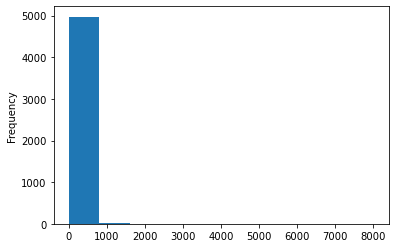

In [53]:
# Create histogram to check distributions
df['price'].plot.hist(bins = 10)

<AxesSubplot:xlabel='price', ylabel='price'>

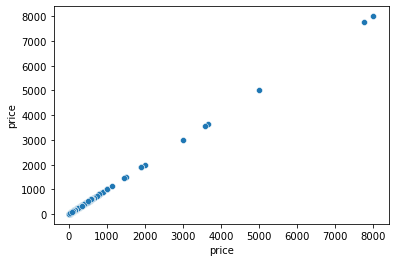

In [54]:
# Create scatterplot of prices
sns.scatterplot(x = 'price', y = 'price',data = df)

In [55]:
df.shape

(4995, 14)

In [69]:
#creating path for export
path = 

In [58]:
#checking path
path = r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis'

In [59]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data','Munich_clean2.csv'))